In [3]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
datar=pd.read_csv("/Users/kkuppula/Documents/data.csv")

In [5]:
datar.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
datar.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

In [8]:
datar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


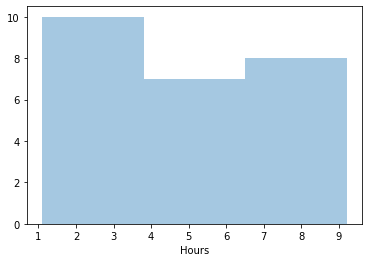

In [20]:
# Univariate Analysis
sns.distplot(datar['Hours'], kde = False)

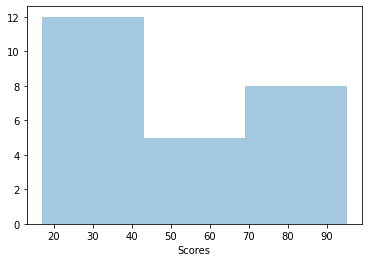

In [21]:
sns.distplot(datar['Scores'], kde = False)

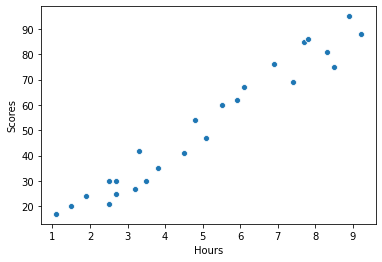

In [22]:
#Bivariate Analysis
sns.scatterplot(x=datar['Hours'], y=datar['Scores'])

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
y=datar.Scores
X=datar.Hours
X=sm.add_constant(X)
X.head()

,const,Hours
0,1.0,2.5
1,1.0,5.1
2,1.0,3.2
3,1.0,8.5
4,1.0,3.5


In [28]:
est=sm.OLS(y,X)

In [31]:
est=est.fit()

In [32]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 02 May 2023   Prob (F-statistic):           9.13e-17
Time:                        11:13:09   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
#Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
y=datar[['Scores']]
X=datar[['Hours']]


In [37]:
regressor=LinearRegression(0)

/Users/kkuppula/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass fit_intercept=0 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [38]:
regressor.fit(X,y)

LinearRegression(fit_intercept=0)

In [39]:
y_pred=regressor.predict(X)

In [40]:
y_pred

array([[25.43564268],
       [51.88871106],
       [32.55762263],
       [86.4811851 ],
       [35.60989975],
       [15.26138561],
       [93.60316505],
       [55.95841389],
       [84.44633369],
       [27.47049409],
       [78.34177945],
       [60.02811672],
       [45.78415682],
       [33.57504833],
       [11.19168278],
       [90.55088793],
       [25.43564268],
       [19.33108843],
       [62.06296813],
       [75.28950232],
       [27.47049409],
       [48.83643394],
       [38.66217687],
       [70.20237379],
       [79.35920515]])

In [41]:
mean_squared_error(y,y_pred)

30.09134450661306